# 1: Reading into the data using CSV library:

In [1]:
import csv #Reading into the data
with open('acw_user_data.csv', mode='r') as user_data: 
    All_Data = csv.reader( user_data, delimiter=',' )

In [2]:
#Checking the Headers
with open('acw_user_data.csv', mode='r') as user_data:
    All_Data = csv.reader( user_data, delimiter=',' )
    for i,line in enumerate(All_Data):
        if i==0: 
            print(line)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


# 2,3: Converting all flat structures into nested structures and checking for missing rows of dependant columns:

In [3]:
#Creating a List that contains Dictionary of All persons only with their first names in it
processed=[]
with open('acw_user_data.csv', mode='r') as user_data:
    All_Data = csv.reader( user_data, delimiter=',' )
    for i,line in enumerate(All_Data):
        if i==0:
            continue
        else:
            processed.append(({"First Name":line[11]}))   

In [4]:
#Importing all the required data into a single list
with open('acw_user_data.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    data = list(reader)

In [5]:
#Appending All information from data acquired to the individual dictionaries of all persons created earlier as per the appropriate data type
Missing_Rows=[]
for m in range(len(processed)):
    processed[m].update({"Last Name":data[m][13]})
    processed[m].update({"Age":int(data[m][3])})
    processed[m].update({"Sex":data[m][18]})
    processed[m].update({"Age":int(data[m][3])})
    processed[m].update({"Sex":data[m][18]})
    if data[m][16]=="True": #Individually checking for all boleans and assigning accordingly
        processed[m].update({"Retired":True})
    else:
        processed[m].update({"Retired":False})
    processed[m].update({"Martial Status":data[m][14]})
    if data[m][10]=="":
        Missing_Rows.append(m+2) #Missing Rows are as per the actual row number in csv file
        processed[m].update({"Dependents":0})
    else:
        processed[m].update({"Dependents":data[m][10]})
    processed[m].update({"Yearly Salary":int(data[m][17])})
    processed[m].update({"Yearly Pension":int(data[m][15])})
    processed[m].update(({"Company":data[m][5]}))
    processed[m].update({"Commute Distance":float(data[m][4])})
    #Appending the additional information for Address, Vehicle and Credit Cards as dictionaries inside dictionaries.
    processed[m].update(({"Address":{"Street":data[m][0],"City":data[m][1],"Post Code":data[m][2]}}))
    processed[m].update(({"Vehicle:":{"Make":data[m][19],"Model":data[m][20],"Year":data[m][21],"Category":data[m][22]}}))
    processed[m].update({"Credit Card":{"Start_Date":data[m][6],"End_Date":data[m][7],"Number":int(data[m][8]),"CCV":int(data[m][9]),"IBAN":data[m][12]}})
print(f"Rows with missing dependent values in CSV file are {Missing_Rows}")

Rows with missing dependent values in CSV file are [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985]


# 4,5:Writing all records for processed, retired and employed employees

In [6]:
import json #Creating a class to write all the files

class JSONWriter:
    def __init__(self, filename):
        self.filename = filename
    
    def write_data(self, data):
        with open(self.filename, 'w') as f:
            json.dump(data, f)


In [7]:
writer = JSONWriter('processed.json') #Using json writer class made above
writer.write_data(processed)

In [8]:
#Seprating Retired and Employed database
Retired=[]
Employed=[]
for i in range(len(processed)):
    if processed[i]["Retired"]==True:
        Retired.append((processed[i]))
    else:
        Employed.append((processed[i]))

In [9]:
#Using the json writer class made above
writer = JSONWriter('Retired.json') 
writer.write_data(Retired)
writer = JSONWriter('Employed.json')
writer.write_data(Employed)

# 6:Calculating Issues in credit card enteries

In [10]:
#Creating a class to identify rows with cards having expiry more than 10 years and then appending them to a list
class CardRemover:
    def __init__(self, filename):
        self.filename = filename
    
    def remove_expired_cards(self):
        card_removal = []
        with open(self.filename, 'r') as file:
            reader = csv.reader(file)
            next(reader)
            for i, row in enumerate(reader):
                date1 = row[6]
                date2 = row[7]
                month1, year1 = map(int, date1.split('/'))
                month2, year2 = map(int, date2.split('/'))
                year_diff = year2 - year1
                month_diff = month2 - month1
                if month_diff < 0:
                    year_diff -= 1
                    month_diff += 12
                total_months = month_diff + (year_diff * 12) #Calculating total number of years  
                if total_months > 120.082: #Comparing the total months with months in 10 years i.e. 120.082
                    card_removal.append(i)
        print(f"The row numbers with cards having expiry more than 10 years are {card_removal}")
        return card_removal
card_remover = CardRemover('acw_user_data.csv')  # create instance with CSV filename
removed_rows = card_remover.remove_expired_cards()  # remove expired cards and get row numbers
#For months calculation and class syntax help was taken from ChatGPT

The row numbers with cards having expiry more than 10 years are [1, 6, 7, 15, 23, 30, 32, 34, 35, 40, 41, 51, 52, 53, 55, 56, 63, 68, 72, 75, 76, 81, 85, 86, 87, 91, 101, 106, 110, 113, 114, 117, 122, 133, 134, 136, 137, 142, 147, 155, 161, 164, 168, 178, 179, 182, 190, 193, 198, 201, 218, 220, 226, 229, 230, 235, 247, 251, 252, 260, 261, 263, 265, 271, 276, 281, 286, 287, 298, 305, 308, 310, 311, 313, 317, 318, 319, 321, 327, 328, 329, 330, 331, 344, 346, 347, 349, 351, 357, 362, 364, 370, 377, 389, 390, 391, 393, 396, 399, 403, 405, 408, 412, 413, 418, 421, 422, 424, 433, 434, 438, 446, 449, 452, 454, 464, 467, 468, 474, 476, 481, 485, 492, 497, 498, 500, 504, 505, 507, 511, 512, 514, 516, 520, 528, 530, 531, 540, 551, 552, 554, 564, 566, 573, 574, 586, 588, 594, 596, 599, 604, 606, 607, 611, 620, 622, 626, 627, 629, 630, 643, 647, 655, 658, 663, 664, 670, 673, 694, 697, 698, 709, 712, 715, 716, 719, 721, 737, 742, 749, 750, 752, 755, 756, 761, 767, 769, 776, 777, 778, 779, 780, 781,

In [11]:
remove_ccard=[] #Indexing the processed list using indexes obtained from list in class above to obtain the cards data to be removed
for i in removed_rows:
    remove_ccard.append(processed[i])

In [12]:
#Using the json writer class to create a json file for remove_ccard
writer = JSONWriter('remove_ccard.json')
writer.write_data(remove_ccard)

# 6:Creating the salary-commute key and writing the newly added data to json file

In [13]:
import json #Loading and reading the processed file
with open("processed.json", mode='r') as data:
    commute=json.load(data)

In [14]:
for i in range(len(commute)):
    if commute[i]["Commute Distance"]<=1:
        commute[i].update({'Salary-Commute':commute[i]["Yearly Salary"]}) #if commute distance is less than or equal to 1 value being added as yearly salary
    elif commute[i]["Commute Distance"]>1:
        commute[i].update({'Salary-Commute':round(commute[i]["Yearly Salary"]/commute[i]["Commute Distance"],2)}) #Dividing the salary by distance in miles than rounding it off to two decimal places

In [15]:
with open('commute.json', mode='w') as Data2:
    json.dump( commute, Data2 )

# Using Pandas and Seaborn

In [16]:
import pandas as pd
my_data2 = pd.read_json('./processed.json')

In [17]:
import pandas as pd
my_data=pd.read_csv('./acw_user_data.csv')
Mean_Salary=my_data["Yearly Salary (GBP)"].mean()
Median_Age=my_data["Age (Years)"].median()
print(f"Mean salary of all the people in CSV file is {Mean_Salary}") #Calculating Mean Salary
print(f"Median age of all the people in CSV file is {Median_Age}")   #Calculating Median Age

Mean salary of all the people in CSV file is 57814.078
Median age of all the people in CSV file is 54.0


In [18]:
number_of_bins=((my_data["Age (Years)"].max())-(my_data["Age (Years)"].min()))/5 #Calculating number of bins required
number_of_bins

14.6

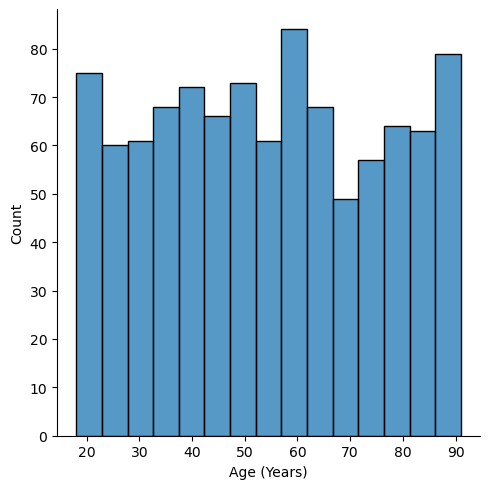

In [19]:
import seaborn as sns
Age_Bins=sns.displot(data=my_data,x="Age (Years)",bins=15) #Ploting the Age as per bins calculated

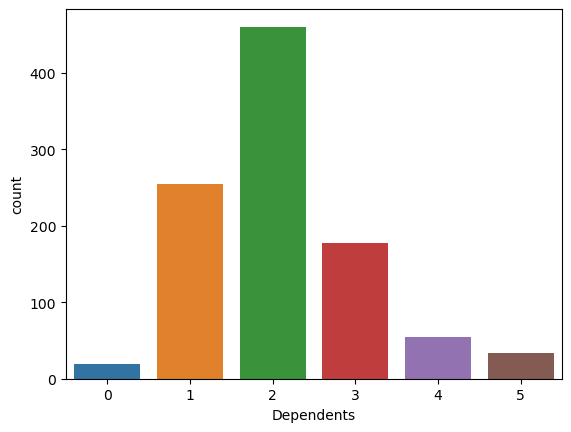

In [20]:
Dependants_Error=my_data["Dependants"].fillna(value=0) #fixing the null values for dependents
Dependants_Err_Fix=sns.countplot(data=my_data2,x="Dependents")

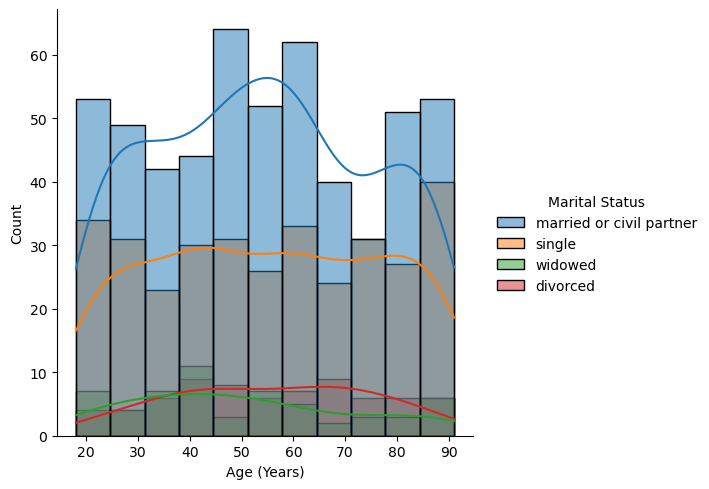

In [21]:
Age_Cond_Mari1=sns.displot(data=my_data,x="Age (Years)",hue="Marital Status",kde=True) #Plotting Age conditioned on marital status

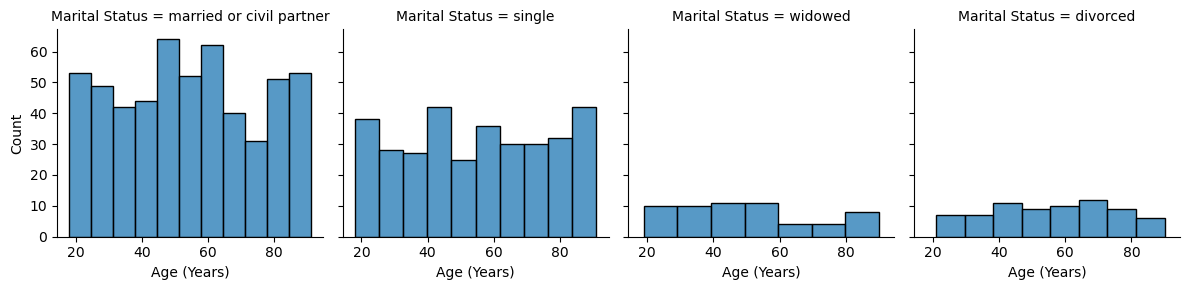

In [22]:
g=sns.FacetGrid(data=my_data, col="Marital Status", col_order=["married or civil partner", "single", "widowed", "divorced"])

# Plot age distribution for each subplot
Age_Cond_Mari2=g.map(sns.histplot, "Age (Years)")


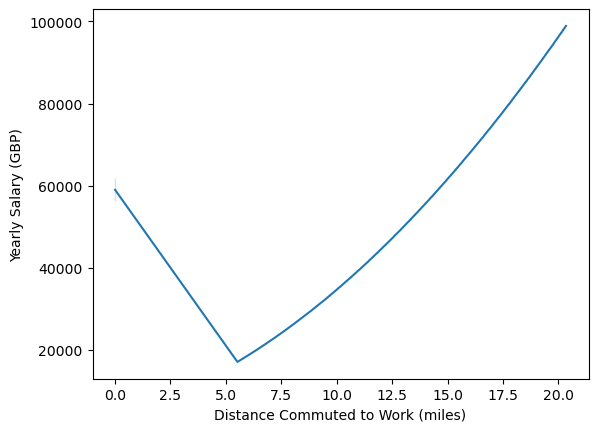

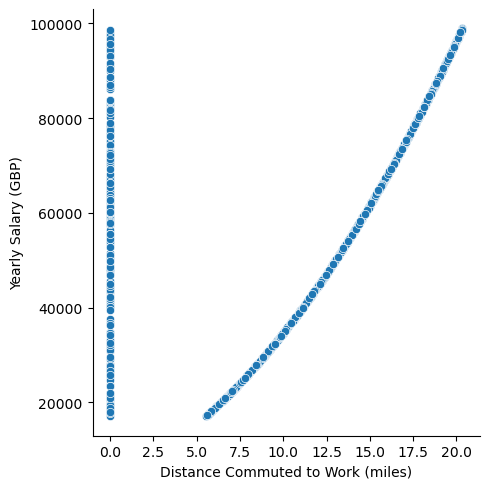

In [23]:
Comm_Sal1=sns.lineplot(data=my_data, x='Distance Commuted to Work (miles)', y='Yearly Salary (GBP)') #Plotting  Commuted distance against salary. 
Comm_Sal2=sns.relplot(data=my_data, x='Distance Commuted to Work (miles)', y='Yearly Salary (GBP)') 

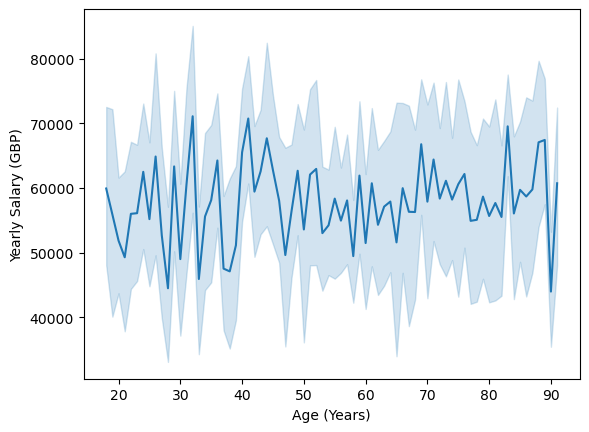

In [24]:
Age_Sal=sns.lineplot(data=my_data, x='Age (Years)',y='Yearly Salary (GBP)') #Plotting Age against Salary

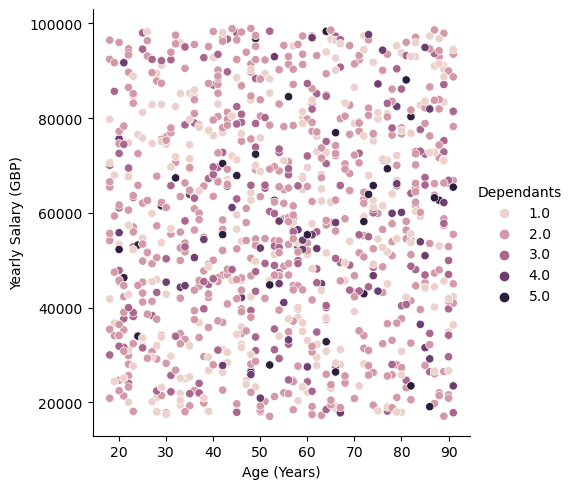

In [25]:
Age_Sal_Cond_Depend1=sns.relplot(data=my_data, x='Age (Years)',y='Yearly Salary (GBP)',hue='Dependants') #Age against Salary conditioned by Dependants 

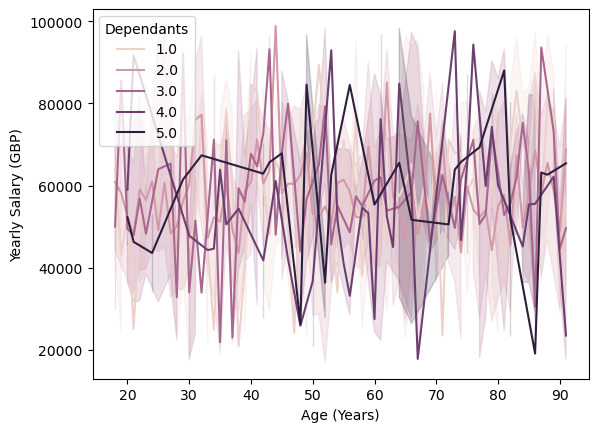

In [27]:
Age_Sal_Cond_Depend2=sns.lineplot(data=my_data, x='Age (Years)',y='Yearly Salary (GBP)',hue='Dependants') #Age against Salary conditioned by Dependants 

In [28]:
#Saving All the plots created above
Age_Bins.savefig("./Age_Bins.png")
Dependants_Err_Fix.figure.savefig("./Dependants_Err_Fix.png")
Age_Cond_Mari1.savefig("./Age_Cond_Mari1.png") 
Age_Cond_Mari2.savefig("./Age_Cond_Mari2.png") 
Comm_Sal1.figure.savefig("./Comm_Sal1.png")
Comm_Sal2.savefig("./Comm_Sal2.png") 
Age_Sal.figure.savefig("./Age_Sal.png")
Age_Sal_Cond_Depend1.savefig("./Age_Sal_Cond_Depend1.png") 
Age_Sal_Cond_Depend2.figure.savefig("./Age_Sal_Cond_Depend2.png") 